# Funciones de distribución de probabilidad

### Distribución uniforme

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
a = 1
b = 100
n = 2000000 # Conforme aumentamos la cantidad de muestras más se aprecia la distribución uniforme
data = np.random.uniform(a, b, n)

(array([199249., 200358., 199695., 200750., 199781., 200114., 200087.,
        200026., 199671., 200269.]),
 array([ 1.00010085, 10.90008902, 20.8000772 , 30.70006538, 40.60005356,
        50.50004173, 60.40002991, 70.30001809, 80.20000627, 90.09999444,
        99.99998262]),
 <a list of 10 Patch objects>)

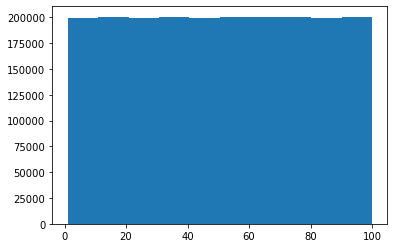

In [4]:
%matplotlib inline
plt.hist(data)

### Distribución normal

In [5]:
data = np.random.randn(1000000) # Z = (X - mu) /  sd  -> N(0,1), X = mu + sd * Z     (Tipificar)

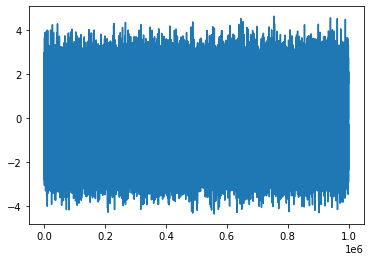

In [6]:
x = range(1, 1000001)
plt.plot(x, data)

(array([2.77000e+02, 4.79800e+03, 4.25160e+04, 1.73308e+05, 3.31251e+05,
        2.95916e+05, 1.25181e+05, 2.44090e+04, 2.24400e+03, 1.00000e+02]),
 array([-4.3648865 , -3.46601259, -2.56713867, -1.66826475, -0.76939084,
         0.12948308,  1.028357  ,  1.92723091,  2.82610483,  3.72497875,
         4.62385267]),
 <a list of 10 Patch objects>)

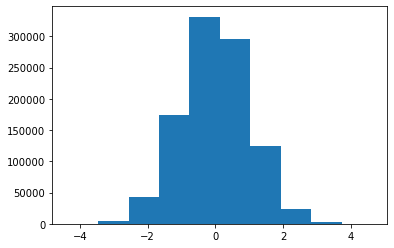

In [7]:
plt.hist(data)

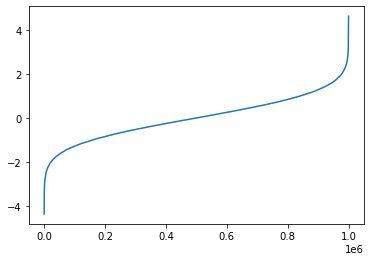

In [8]:
plt.plot(x, sorted(data))   # Si ordenamos los datos obtenemos la función de distribución acumulada

(array([  11.,   95.,  523., 1633., 2829., 2827., 1520.,  457.,   92.,
          13.]),
 array([-4.10957265, -2.17792079, -0.24626894,  1.68538292,  3.61703477,
         5.54868663,  7.48033849,  9.41199034, 11.3436422 , 13.27529405,
        15.20694591]),
 <a list of 10 Patch objects>)

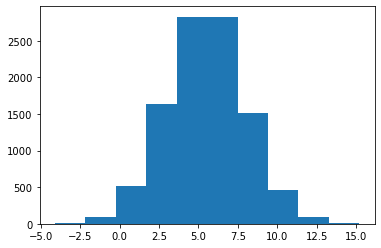

In [9]:
# Vamos a crear otra función de distribución normal, donde introduciremos los valores que definen una campana de Gauss.
mu = 5.5 #media
sd = 2.5 #desviación estandar
n = 10000
data = 5.5 + sd * np.random.randn(n)
plt.hist(data)

In [10]:
data = np.random.rand(2,4)
data

array([[0.25362923, 0.51914844, 0.66974487, 0.61660522],
       [0.01305154, 0.5292321 , 0.38179668, 0.79184536]])

### Simulación de Monte Carlo

* Generamos dos números aleatorios entre 0 y 1.
* Calculamos x*x + y*y.
    * Si el valor valor es inferior a 1 -> estamos dentro del círculo.
    * Si el valor es superior a 1 -> estamos fuera del círculo.
* Calculamos el número de veces que los puntos estrán dentro del circulo frente al número de intentos para obetener una aproximación a la función de probabilidad que buscamos.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento bastantes veces, para obtener diferentes aproximaciones de pi.

In [11]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []    
    for i in range(n_exp):
        value = 0
        # Coordenadas aleatorias entre 0 y 1 a lo largo de los ejes.
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j]+ y[j]*y[j])
            if z <=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return pi, fig
    

3.1424179999999984


(3.1424179999999984, [<matplotlib.lines.Line2D at 0x28d9c806c70>])

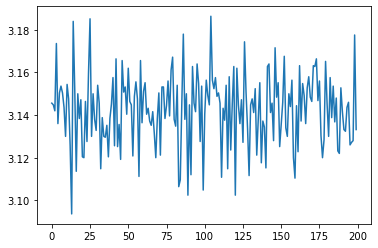

In [12]:
pi_montecarlo(n=10000, n_exp=200)

### Dummy dataset

In [13]:
n = 1000000 # Número de muestras
data = pd.DataFrame(
    {
        'A':np.random.randn(n),
        'B':1.5*2.5*np.random.randn(n),
        'C':np.random.uniform(5, 32, n)
    }
)

In [14]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000799,0.004414,18.495929
std,1.001063,3.751500,7.791944
min,-4.982444,-17.327772,5.000016
25%,-0.674948,-2.523980,11.742239
50%,0.000236,0.006984,18.486968
75%,0.674956,2.531610,25.243178
max,5.076891,18.548316,31.999997


(array([2.90000e+01, 1.46100e+03, 2.31890e+04, 1.44432e+05, 3.49605e+05,
        3.34483e+05, 1.26776e+05, 1.89160e+04, 1.07400e+03, 3.50000e+01]),
 array([-4.9824436 , -3.97651015, -2.97057671, -1.96464326, -0.95870981,
         0.04722363,  1.05315708,  2.05909053,  3.06502397,  4.07095742,
         5.07689087]),
 <a list of 10 Patch objects>)

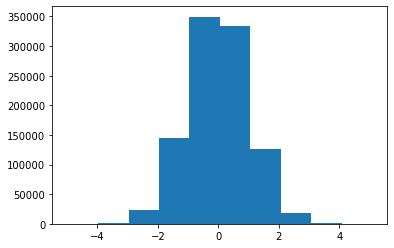

In [15]:
 plt.hist(data['A'])

(array([1.18000e+02, 3.31100e+03, 3.67440e+04, 1.73151e+05, 3.50550e+05,
        3.04700e+05, 1.12512e+05, 1.76400e+04, 1.23600e+03, 3.80000e+01]),
 array([-17.32777202, -13.74016325, -10.15255449,  -6.56494572,
         -2.97733696,   0.6102718 ,   4.19788057,   7.78548933,
         11.3730981 ,  14.96070686,  18.54831562]),
 <a list of 10 Patch objects>)

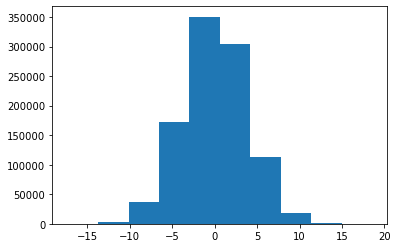

In [16]:
 plt.hist(data['B'])

(array([ 99744., 100050., 100371., 100071., 100254., 100069.,  99401.,
        100145., 100083.,  99812.]),
 array([ 5.00001552,  7.70001369, 10.40001187, 13.10001004, 15.80000822,
        18.5000064 , 21.20000457, 23.90000275, 26.60000092, 29.2999991 ,
        31.99999728]),
 <a list of 10 Patch objects>)

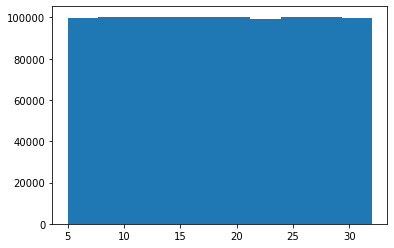

In [17]:
 plt.hist(data['C'])

In [18]:
datasets_dir = r'..\..\python-ml-course-master\datasets'
filepath = datasets_dir + os.sep + r'customer-churn-model\Customer Churn Model.txt'

In [19]:
data = pd.read_csv(filepath)
column_names = data.columns.values.tolist()

In [20]:
a = len(column_names)
a

21

In [24]:
new_data = pd.DataFrame(
    {
        'Column name':column_names,
        'A': np.random.randn(a),
        'B': np.random.uniform(0,1,a)
    }, index=range(42, 42 + a) # utilizalo por si quieres unir dos dataframes y su indices sean consecutivos.
)

In [25]:
new_data

,Column name,A,B
42,State,0.264333,0.043868
43,Account Length,1.456407,0.947161
44,Area Code,-0.011332,0.571283
45,Phone,1.336910,0.348110
46,Int'l Plan,0.984762,0.393457
47,VMail Plan,0.252860,0.961920
48,VMail Message,-0.870157,0.471854
49,Day Mins,0.655061,0.308746
50,Day Calls,-0.290544,0.425505
51,Day Charge,0.221468,0.472151
